In [22]:
import matplotlib.pyplot as plt

In [23]:
from simulator.BlockchhainGymEnv import BlockchainCustomEnv
from sb3_contrib import RecurrentPPO
import numpy as np
import pandas as pd
from simulator.BlockchhainGymEnvWithCustomDataset import BlockchainCustomEnvWithCustomDataset

env = BlockchainCustomEnv(
        transaction_coefficient=0.8500582486876478,
        waiting_time_coefficient=0.8119021197691496,
        pending_transaction_coefficient=0.7869582013882934
    )

model = RecurrentPPO(
    "MlpLstmPolicy",
    env,
    verbose=1,
    tensorboard_log="./ppo_SimulatorBlockchainEnv_tensorboard/",
    n_steps=8192,
)
# loading model
model = RecurrentPPO.load("simulator/ppo_SimulatorBlockchainEnv_250000")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [24]:
df = pd.read_csv("simulator/sample_transactions.csv")

env_custom_dataset = BlockchainCustomEnvWithCustomDataset(
        transaction_coefficient=0.8500582486876478,
        waiting_time_coefficient=0.8119021197691496,
        pending_transaction_coefficient=0.7869582013882934,
        transactions_data=df
)

In [25]:
obs = env_custom_dataset.reset()

waiting_time = []
all_rewards = []
all_actions = []

# loop through the rows using iterrows()
for index, row in df.iterrows():
    print(row['transaction_size'], row['transaction_data'])
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env_custom_dataset.step(action)
    all_rewards.append(rewards)
    all_actions.append(action)
    w_time = list(info)[0]
    if w_time > 0:
        waiting_time.append(w_time)
    env_custom_dataset.render()


# average waiting time
print("Average waiting time: ", np.sum(waiting_time))

print("Blockchain length", len(env.blockchain.chain))

8 Transaction 77
xxxxxxxxx:  1
Reward:  0.9
44 Transaction 6
xxxxxxxxx:  2
Reward:  4.7805
86 Transaction 12
xxxxxxxxx:  3
Reward:  8.6778
99 Transaction 98
xxxxxxxxx:  4
Reward:  12.07395
77 Transaction 97
xxxxxxxxx:  5
Reward:  13.8470625
7 Transaction 41
xxxxxxxxx:  6
Reward:  15.8682
10 Transaction 46
xxxxxxxxx:  7
Reward:  16.52035
87 Transaction 82
xxxxxxxxx:  8
Reward:  18.95205
43 Transaction 23
xxxxxxxxx:  9
Reward:  19.879143749999997
36 Transaction 43
xxxxxxxxx:  10
Reward:  20.965400000000002
24 Transaction 56
xxxxxxxxx:  11
Reward:  22.16511
67 Transaction 41
xxxxxxxxx:  12
Reward:  38.4054
83 Transaction 66
xxxxxxxxx:  13
Reward:  39.997
25 Transaction 79
xxxxxxxxx:  14
Reward:  40.21595769230769
32 Transaction 36
xxxxxxxxx:  15
Reward:  40.63918928571429
3 Transaction 40
xxxxxxxxx:  16
Reward:  42.72196
71 Transaction 52
xxxxxxxxx:  17
Reward:  44.8432875
27 Transaction 21
xxxxxxxxx:  18
Reward:  45.50439705882353
57 Transaction 2
xxxxxxxxx:  19
Reward:  46.269475
20 Tra

In [28]:
#total 1's in actions
np.sum(all_actions)

132

In [29]:
len(all_actions)

10000

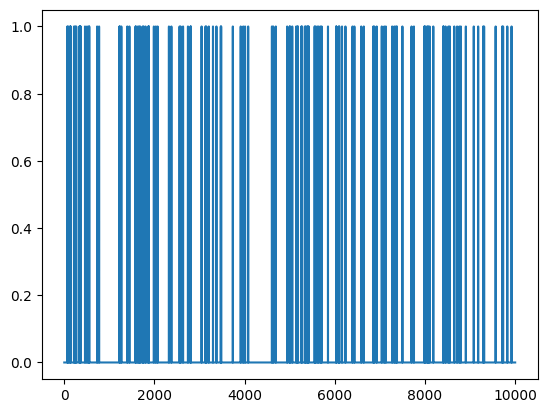

In [27]:
#plotting only 1 actions
plt.plot(all_actions)

In [8]:
all_rewards

[0.9,
 4.7916,
 5.6913,
 7.0901499999999995,
 10.1101125,
 11.38299,
 12.781474999999999,
 15.747899999999998,
 18.5725125,
 21.2999,
 23.963610000000003,
 26.57745,
 27.6572625,
 33.313730769230766,
 40.21362857142857,
 42.32297,
 42.974634374999994,
 45.238614705882355,
 46.02070833333333,
 48.39136578947368,
 49.2665475,
 50.21617142857143,
 52.72536818181818,
 53.72951086956522,
 56.28298125,
 58.82266200000001,
 59.85575192307692,
 60.935272222222224,
 63.5512125,
 64.65514137931035,
 65.79622,
 66.96881129032258,
 69.66883593749999,
 70.8525590909091,
 73.56191029411764,
 77.74724142857143,
 83.37214583333333,
 85.90939459459459,
 86.94577105263159,
 88.0120423076923,
 90.60364125,
 91.68869634146341,
 94.29798214285714,
 95.4012558139535,
 98.02419545454545,
 99.14228,
 100.28191304347826,
 101.44405531914893,
 104.1228375,
 -93.26217551020409,
 0.9,
 4.79175,
 5.692575,
 8.58605,
 9.7354875,
 11.084340000000001,
 12.532,
 15.534664285714285,
 18.384581249999997,
 19.63795,
 20.

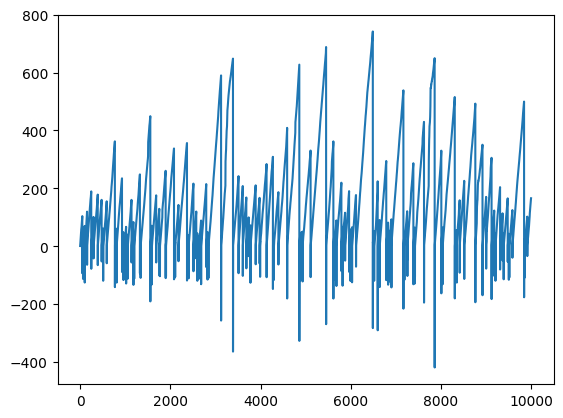

In [14]:
#plotting rewards
plt.plot(all_rewards)

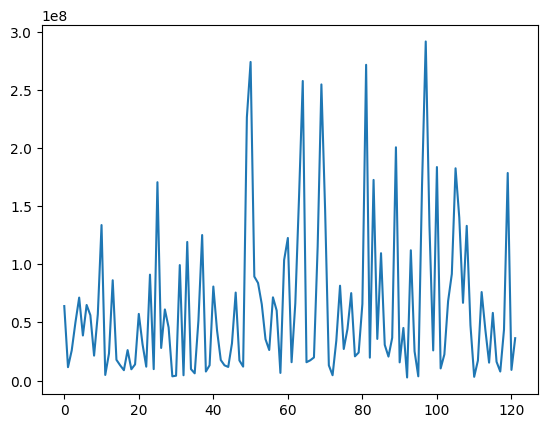

In [11]:
#plotting waiting time
plt.plot(waiting_time)

In [32]:
np.sum(waiting_time)

7906540459.970598